In [186]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from mlxtend.feature_selection import SequentialFeatureSelector as msfs
from sklearn.ensemble import RandomForestClassifier
from pickle import dump

## 1.Loading Data

In [87]:
train_data = pd.read_csv('Datasets/SalaryData_Train(1).csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_data = pd.read_csv('Datasets/SalaryData_Test(1).csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
train_data.shape,test_data.shape

((30161, 14), (15060, 14))

In [12]:
30161+15060

45221

## 2.Data analysis

In [88]:
train_data.shape

(30161, 14)

In [7]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [89]:
train_data.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## 3.Data preprocessing

In [4]:
data = [train_data, test_data]
data= pd.concat(data)
print(data.shape)
data.head()

(45221, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [22]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [23]:
data['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2])

In [24]:
data['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [25]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [5]:
#Finding the special characters in the data frame 
data.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [28]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [61]:
#data2 = data.drop(['age','educationno','capitalgain','native'],axis=1)
data2 = data.drop(['educationno','capitalgain','native'],axis=1)
data2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,<=50K


In [62]:
data2['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [63]:
data2['Salary'] = data2['Salary'].apply( lambda x: 0 if x == ' <=50K' else 1).astype('int')
data2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,0


In [41]:
data2['Salary'].unique()

array([0, 1])

In [42]:
data2.dtypes

workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalloss       int64
hoursperweek      int64
Salary            int64
dtype: object

In [64]:
lbl_encoder = LabelEncoder()
data2['workclass'] = lbl_encoder.fit_transform(data2['workclass'])
data2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,Salary
0,39,5,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,0
1,50,4,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,0
2,38,2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,0
3,53,2,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,0
4,28,2,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,0


In [65]:
data2['education'] = lbl_encoder.fit_transform(data2['education'])
data2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,Salary
0,39,5,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,0
1,50,4,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,0
2,38,2,11,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,0
3,53,2,1,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,0
4,28,2,9,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,0


In [66]:
data2['maritalstatus'] = lbl_encoder.fit_transform(data2['maritalstatus'])
data2['occupation'] = lbl_encoder.fit_transform(data2['occupation'])
data2['relationship'] = lbl_encoder.fit_transform(data2['relationship'])
data2['race'] = lbl_encoder.fit_transform(data2['race'])
data2['sex'] = lbl_encoder.fit_transform(data2['sex'])
data2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek,Salary
0,39,5,9,4,0,1,4,1,0,40,0
1,50,4,9,2,3,0,4,1,0,13,0
2,38,2,11,0,5,1,4,1,0,40,0
3,53,2,1,2,5,0,2,1,0,40,0
4,28,2,9,2,9,5,2,0,0,40,0


### Data vizualization

<AxesSubplot:xlabel='education'>

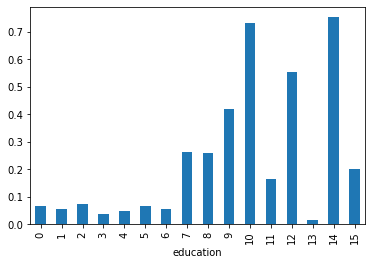

In [13]:
data2.groupby('education').Salary.mean().plot(kind='bar')

**Adults with an educational background of Prof-school (10) and 12th (14) will have a better income and it is likely possible that their income is higher than 50K.**

<AxesSubplot:xlabel='occupation'>

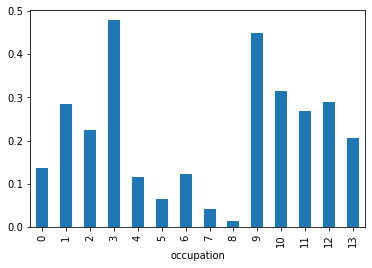

In [14]:
data2.groupby('occupation').Salary.mean().plot(kind='bar')

**Our data suggest that people with occupation Prof-specialty (5) and Tech-support (9) will have a better chance of earning an income of more than 50K.**

<AxesSubplot:xlabel='relationship'>

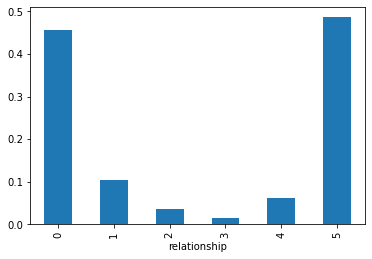

In [62]:
data2.groupby('relationship').Salary.mean().plot(kind='bar')

**relationship chart shows us that Not-in-family (0) and Other-relative (5) has a higher income.
A married couple would most likely earn >50K.**

<AxesSubplot:xlabel='maritalstatus'>

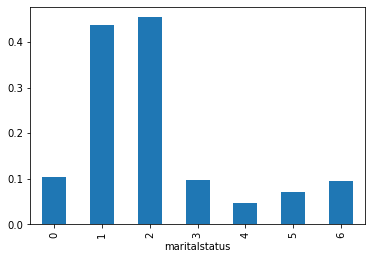

In [60]:
data2.groupby('maritalstatus').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

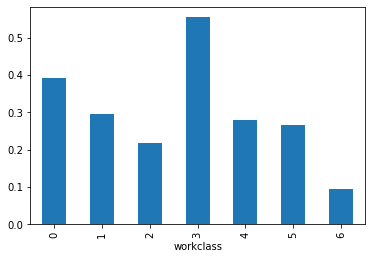

In [61]:
data2.groupby('workclass').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

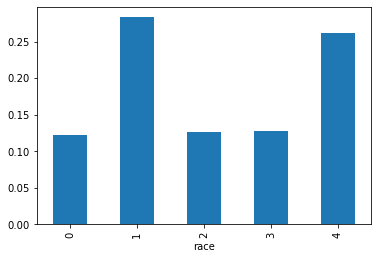

In [63]:
data2.groupby('race').Salary.mean().plot(kind='bar')

**As per the data, an Black (1) or a Other (4) have more chances of earning more than 50K.**

<AxesSubplot:xlabel='sex'>

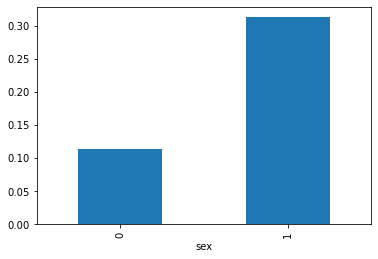

In [64]:
data2.groupby('sex').Salary.mean().plot(kind='bar')

**The sex bar chart provides us some useful insight into the data that Female (1) 
are more likely to have a higher income.**

## spliting X,y

In [67]:
data2.isna().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalloss      0
hoursperweek     0
Salary           0
dtype: int64

In [173]:
X = data2.drop(labels='Salary',axis=1)
y = data2[['Salary']]
X.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek
0,39,5,9,4,0,1,4,1,0,40
1,50,4,9,2,3,0,4,1,0,13
2,38,2,11,0,5,1,4,1,0,40
3,53,2,1,2,5,0,2,1,0,40
4,28,2,9,2,9,5,2,0,0,40


In [69]:
y.head()

,Salary
0,0
1,0
2,0
3,0
4,0


### scaling X

In [174]:
std_sclr = StandardScaler()
X = std_sclr.fit_transform(X)

## Train test split

In [175]:
col = ['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalloss', 'hoursperweek']
X_train =pd.DataFrame(X[:30161,:],columns=col)
X_test = pd.DataFrame(X[30161:,:],columns=col)

print(X_train.shape)
X_train.head()


(30161, 10)


,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek
0,0.034190,2.917682,-0.344049,0.942956,-1.482608,-0.258376,0.384115,0.693790,-0.218728,-0.078121
1,0.866399,1.873973,-0.344049,-0.389984,-0.737525,-0.884462,0.384115,0.693790,-0.218728,-2.326714
2,-0.041466,-0.213446,0.179930,-1.722923,-0.240804,-0.258376,0.384115,0.693790,-0.218728,-0.078121
3,1.093365,-0.213446,-2.439963,-0.389984,-0.240804,-0.884462,-2.018716,0.693790,-0.218728,-0.078121
4,-0.798019,-0.213446,-0.344049,-0.389984,0.752640,2.245968,-2.018716,-1.441359,-0.218728,-0.078121


In [176]:
print(X_test.shape)
X_test.head()

(15060, 10)


,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalloss,hoursperweek
0,-1.024985,-0.213446,-2.439963,0.942956,0.007557,0.993796,-2.018716,0.69379,-0.218728,-0.078121
1,-0.041466,-0.213446,0.179930,-0.389984,-0.489164,-0.884462,0.384115,0.69379,-0.218728,0.754691
2,-0.798019,-1.257155,-0.868027,-0.389984,1.001001,-0.884462,0.384115,0.69379,-0.218728,-0.078121
3,0.412467,-0.213446,1.227887,-0.389984,0.007557,-0.884462,-2.018716,0.69379,-0.218728,-0.078121
4,-0.344087,-0.213446,-2.701952,0.942956,0.255918,-0.258376,0.384115,0.69379,-0.218728,-0.910933


In [177]:
y_train = y[:30161]
y_test = y[30161:]
y_train.shape,y_test.shape

((30161, 1), (15060, 1))

## 4. Base model 
### rbf svm

In [110]:
base_model1 = SVC()
base_model1.fit(X_train,y_train)
pred1 = base_model1.predict(X_test)

In [116]:
accuracy_score(y_test,pred1)

0.801859229747676

In [117]:
confusion_matrix(y_test,pred1)

array([[10190,  1170],
       [ 1814,  1886]])

In [118]:
print('\n',classification_report(y_test,pred1))


               precision    recall  f1-score   support

           0       0.85      0.90      0.87     11360
           1       0.62      0.51      0.56      3700

    accuracy                           0.80     15060
   macro avg       0.73      0.70      0.72     15060
weighted avg       0.79      0.80      0.80     15060



### linear svm

In [123]:
base_model2 = SVC(kernel='linear')
base_model2.fit(X_train,y_train)
pred2 = base_model2.predict(X_test)

In [124]:
accuracy_score(y_test,pred2)

0.7559096945551129

### Poly SVM

In [121]:
base_model3 = SVC(kernel='poly')
base_model3.fit(X_train,y_train)
pred3 = base_model3.predict(X_test)

In [122]:
accuracy_score(y_test,pred3)

0.7739043824701195

### Best model is SVM rbf

#### Hyperparameter tuning

In [132]:
#Classifier 1 - Gamma = 0.001

model1 = SVC(gamma=0.001)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [133]:
accuracy_score(y_test,y_pred1)

0.7559096945551129

In [134]:
#Classifier 2 - Gamma = 0.1


model2 = SVC(gamma=0.1)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.801527224435591

In [136]:
#Classifier 3 - Gamma = 1

model3 = SVC(gamma=1)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8197211155378487

In [137]:
confusion_matrix(y_test,y_pred3)

array([[10361,   999],
       [ 1716,  1984]])

In [138]:
print('\n',classification_report(y_test,y_pred3))


               precision    recall  f1-score   support

           0       0.86      0.91      0.88     11360
           1       0.67      0.54      0.59      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.72      0.74     15060
weighted avg       0.81      0.82      0.81     15060



In [140]:
#Classifier 3 - Gamma = 2


model4 = SVC(gamma=2)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8185258964143426

In [142]:
#Classifier 4 - Gamma = 0.1 & C = 0.1


model5 = SVC(C=0.1,gamma=0.1)
model5.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)
accuracy_score(y_test,y_pred5)

0.7932934926958831

In [143]:
#Classifier 5 - Gamma = 0.1 & C = 1

model6 = SVC(C=1,gamma=0.1)
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
accuracy_score(y_test,y_pred6)

0.801527224435591

In [144]:
#Classifier 6 - Gamma = 0.1 & C = 10

model7 = SVC(C=10,gamma=0.1)
model7.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)
accuracy_score(y_test,y_pred7)


0.8102921646746348

In [145]:
#Classifier 7 - Gamma = 1 & C = 10

model8 = SVC(C=10,gamma=1)
model8.fit(X_train,y_train)
y_pred8 = model8.predict(X_test)
accuracy_score(y_test,y_pred8)

0.8071049136786188

## Feature selection

In [147]:
#let us take classifier 3,with gamma1

msfs_model = msfs(estimator=model3,k_features='best',forward=True,n_jobs=-1)
msfs_model.fit(X_train,y_train)
features = list(msfs_model.k_feature_names_)
features


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

['education', 'maritalstatus', 'capitalloss']

In [150]:
X_train_selected = msfs_model.transform(X_train)
X_train_selected.shape

(30161, 3)

In [149]:
X_test_selected = msfs_model.transform(X_test)
X_test_selected.shape

(15060, 3)

In [152]:
model9 = SVC(gamma=1)
model9.fit(X_train_selected,y_train)
y_pred9 = model9.predict(X_test_selected)
accuracy_score(y_test,y_pred9)


0.8158698539176626

## feature selection using randomforest

In [155]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
importantces = rf_model.feature_importances_
importance_df = pd.DataFrame({'features':X_train.columns,'importances':importantces})
importance_df

,features,importances
0,age,0.274199
1,workclass,0.060733
2,education,0.126389
3,maritalstatus,0.079030
4,occupation,0.116997
5,relationship,0.122104
6,race,0.025383
7,sex,0.015371
8,capitalloss,0.044586
9,hoursperweek,0.135208


<AxesSubplot:>

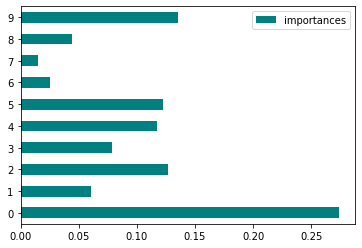

In [156]:
importance_df.plot(kind='barh',color='teal')

In [161]:
X_train.shape,X.shape

((30161, 10), (45221, 10))

In [178]:
X_train.shape,X_test.shape

((30161, 10), (15060, 10))

In [163]:
data2.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [179]:
X_train = pd.DataFrame(X_train,columns=(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalloss', 'hoursperweek']))
X_test = pd.DataFrame(X_test,columns=(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalloss', 'hoursperweek']))

In [184]:
X_train.shape
temp_train = X_train[['age','hoursperweek','education','relationship','occupation']]
temp_test = X_test[['age','hoursperweek','education','relationship','occupation']]
temp_train.shape,temp_test.shape,y_train.shape,y_test.shape

((30161, 5), (15060, 5), (30161, 1), (15060, 1))

In [185]:
model10 = SVC(gamma=1)
model10.fit(temp_train,y_train)
y_pred10 = model10.predict(temp_test)
accuracy_score(y_test,y_pred10)

0.8179282868525897

## model deployment

In [187]:
dump(model10,open('final_model.pkl','wb'))